In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_grades= pd.read_csv('Expanded_data_with_more_features.csv')

In [3]:
df_grades

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
df_grades.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Part 1: Choose a dataset

Question 1:

we chose the Students Exam Scores dataset

Question 2:

This dataset includes scores from three test scores of students at a public school and a variety of personal and socio-economic factors that may have interaction effects upon them.

Question 3:

In [5]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


- There are 5 numeric variables and 10 categorical variables. 
- We can see that *EthnicGroup*, *ParentEduc*, *TestPrep*, *ParentMaritalStatus*, *PracticeSport*, *IsFirstChild*, *NrSiblings*, *TransportMeans*, and *WklyStudyHours* have missing values.
- We dont have information about the feature *Unnamed: 0*, and it seems unrelevant to our analysis. 

In [6]:
df_grades.drop(['Unnamed: 0'], axis=1, inplace=True)
df_grades

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


Question 4:

- Our sample includes 30641 records and has 14 features

### Part 2: EDA

Question 1:

we will choose variabls we think they have a correlation (might be strong) with the exam scores.
we will discuss about it in Part 5.

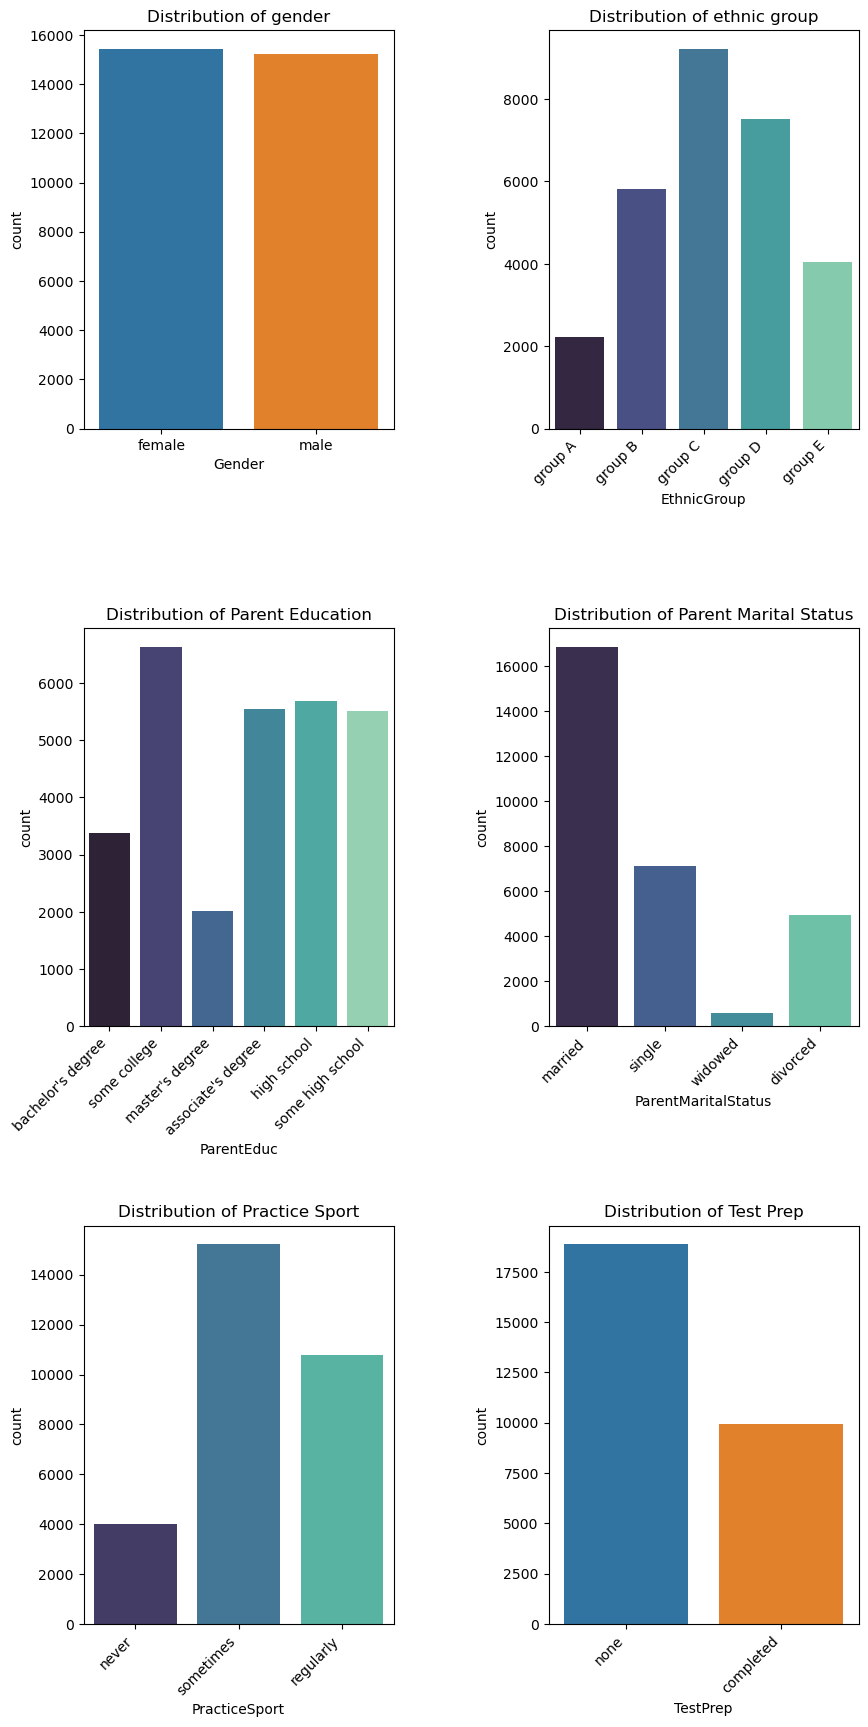

In [7]:
# Create 3 rows and 2 columns for the plots, we dont want them to catch a lot of space one after another
fig, axes = plt.subplots(3, 2, figsize=(10, 20.7),gridspec_kw={'wspace': 0.5, 'hspace':0.5})

# Gender
sns.countplot(data=df_grades, x='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of gender')

# Ethnic group
ethnic = df_grades.dropna().EthnicGroup.unique()
ethnic.sort()
ax = sns.countplot(data=df_grades, x='EthnicGroup', order=ethnic, palette='mako', ax=axes[0, 1])
ax.set_title('Distribution of ethnic group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Parent Education
sns.countplot(data=df_grades, x='ParentEduc', palette='mako', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Parent Education')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")

# Parent Marital Status
sns.countplot(data=df_grades, x='ParentMaritalStatus', palette='mako', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Parent Marital Status')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")

# Practice Sport
sns.countplot(data=df_grades, x='PracticeSport', palette='mako', order=['never', 'sometimes', 'regularly'], ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Practice Sport')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha="right")

# Test Prep
sns.countplot(data=df_grades, x='TestPrep', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Test Prep')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, ha="right")


plt.show()

Question 2:

It might be interesting to check the relationships between the scores in the three tests, the relationship between the scores 
of the exams and the preperetion course and even the relationship between scores exams and practicing sport.

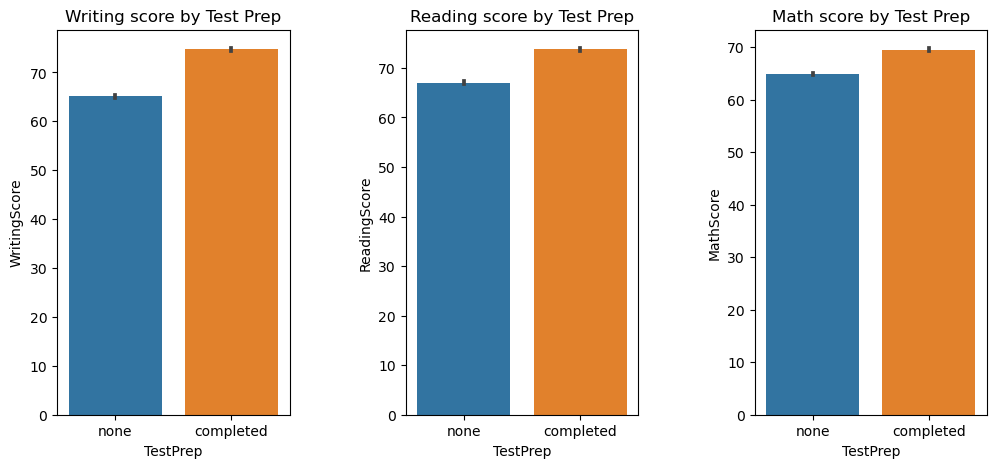

In [8]:
# Create 1 row and 3 columns for the plots, we dont want them to catch a lot of space one after another
fig, axes = plt.subplots(1, 3, figsize=(12, 5) ,gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

# Writing score by Test Prep
sns.barplot(x='TestPrep', y='WritingScore', data=df_grades, ax=axes[0])
axes[0].set(title='Writing score by Test Prep')
axes[0].set_xticklabels(axes[0].get_xticklabels())

# Reading score by Test Prep
sns.barplot(x='TestPrep', y='ReadingScore', data=df_grades, ax=axes[1])
axes[1].set(title='Reading score by Test Prep')
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Math score by Test Prep
sns.barplot(x='TestPrep', y='MathScore', data=df_grades, ax=axes[2])
axes[2].set(title='Math score by Test Prep')
axes[2].set_xticklabels(axes[2].get_xticklabels())


plt.show()

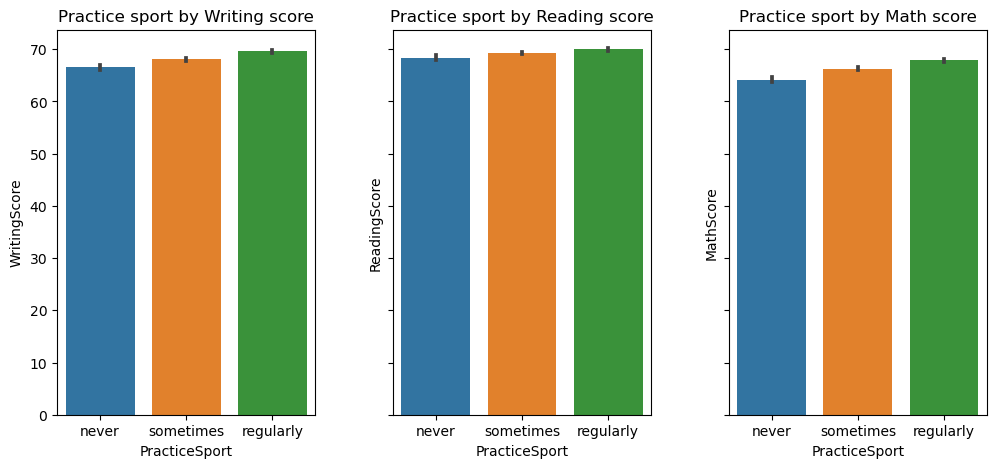

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'wspace': 0.3})

# Practice sport by Writing score
sns.barplot(x='PracticeSport', y='WritingScore', data=df_grades, order=['never', 'sometimes', 'regularly'], ax=axes[0])
axes[0].set(title='Practice sport by Writing score')
axes[0].set_xticklabels(axes[0].get_xticklabels())

# Practice sport by Reading score
sns.barplot(x='PracticeSport', y='ReadingScore', data=df_grades, order=['never', 'sometimes', 'regularly'], ax=axes[1])
axes[1].set(title='Practice sport by Reading score')
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Practice sport by Math score
sns.barplot(x='PracticeSport', y='MathScore', data=df_grades, order=['never', 'sometimes', 'regularly'], ax=axes[2])
axes[2].set(title='Practice sport by Math score')
axes[2].set_xticklabels(axes[2].get_xticklabels())


plt.show()

the correlation between writing score and math score is 0.8071182117316641


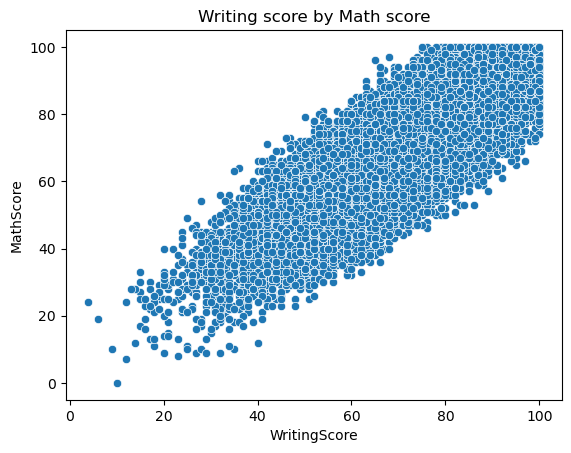

In [10]:
ax = sns.scatterplot(x='WritingScore', y='MathScore', data=df_grades)
ax.set(title='Writing score by Math score')
print("the correlation between writing score and math score is " + str(df_grades['WritingScore'].corr(df_grades['MathScore'])))

the correlation between Math score and Reading score is 0.817824882221507


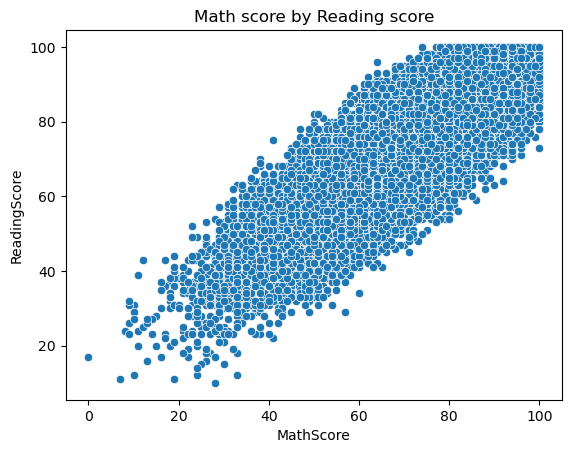

In [11]:
ax = sns.scatterplot(x='MathScore', y='ReadingScore', data=df_grades)
ax.set(title='Math score by Reading score')
print("the correlation between Math score and Reading score is " + str(df_grades['MathScore'].corr(df_grades['ReadingScore'])))

the correlation between Reading score and Writing score is 0.9525844244682469


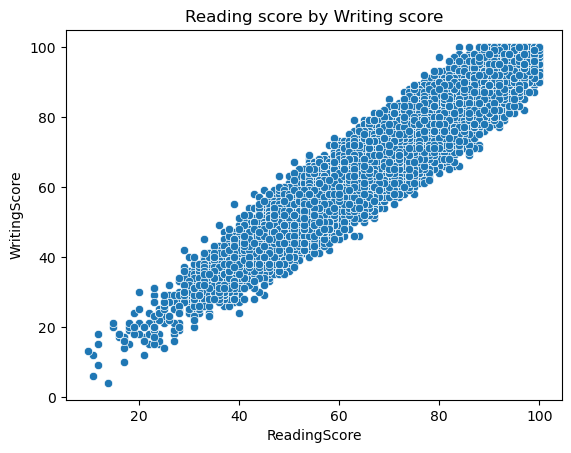

In [12]:
ax = sns.scatterplot(x='ReadingScore', y='WritingScore', data=df_grades)
ax.set(title='Reading score by Writing score')
print("the correlation between Reading score and Writing score is " + str(df_grades['ReadingScore'].corr(df_grades['WritingScore'])))

From the graphs above, we can see there is a strong and positive correlation between the scores of the three exams.
It is surprising finding, we didnt thought that the score in writing exam have influence on math exam.

We want to look on the relationship between the parents education level and the math exam score of the student.
The parents education level is an order categorial feature that runs from "some high school" to "master's degree"

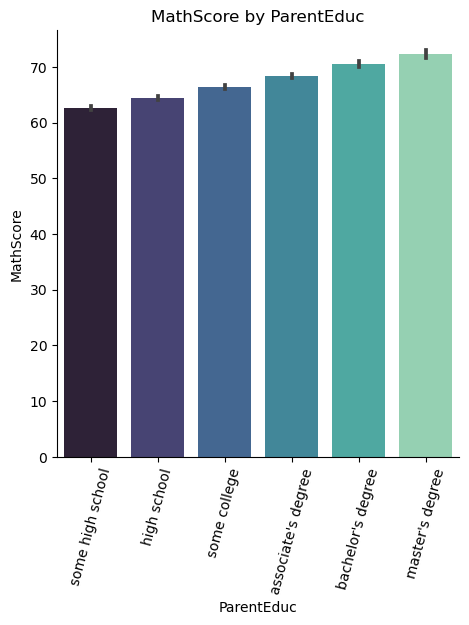

In [13]:
ax = sns.catplot(kind='bar', x='ParentEduc', y='MathScore', data=df_grades, palette= 'mako', order = ['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"])
ax.set(title='MathScore by ParentEduc')
ax.set_xticklabels(rotation=75)
plt.show()

As we can se, it seems there is a positive correlation between the parents education level and the math exam score of the student, 

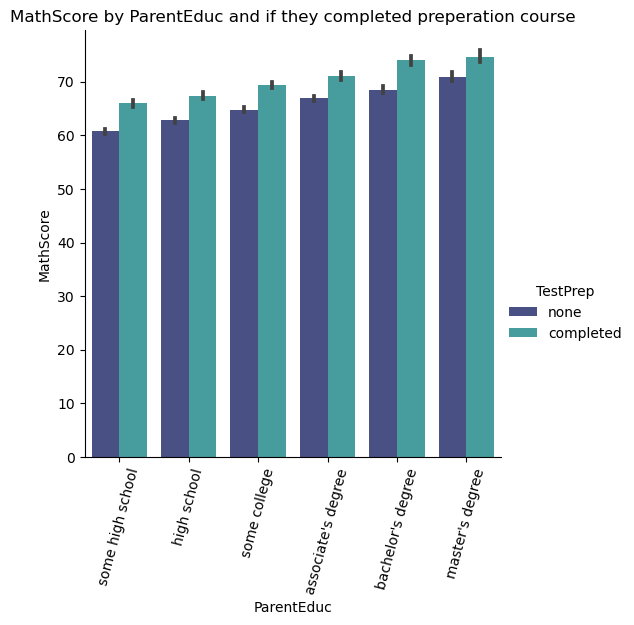

In [14]:
ax = sns.catplot(kind='bar', x='ParentEduc', y='MathScore', hue='TestPrep', data=df_grades, palette= 'mako', order = ['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"])
ax.set(title='MathScore by ParentEduc and if they completed preperation course')
ax.set_xticklabels(rotation=75)
plt.show()

We can see that even under taking the preperation course feature in consideration we still have positive correlation (as we proceed in the education level of the parent, you probably get a higher score in math exam). 

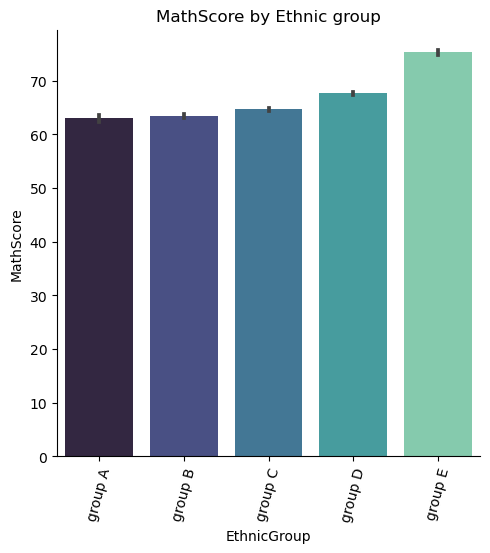

In [15]:
ax = sns.catplot(kind='bar', x='EthnicGroup', y='MathScore', data=df_grades, palette= 'mako', order=ethnic)
ax.set(title='MathScore by Ethnic group')
ax.set_xticklabels(rotation=75)
plt.show()

We can see that there is a relationship between the ethnic group of the student and the score of math exam. 

##### Handling missing data

For handling the missing data we have several options:
We chose to remove the observations with missing data, we are aware that there may be potential biases, but all the options have Disadvantages, we thought that its the reasonable way of all.  
There is an extensive explaination about handling methods.

In [16]:
df_grades_new = df_grades.dropna(subset=['EthnicGroup','ParentEduc','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours'])
df_grades_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               19243 non-null  object 
 1   EthnicGroup          19243 non-null  object 
 2   ParentEduc           19243 non-null  object 
 3   LunchType            19243 non-null  object 
 4   TestPrep             19243 non-null  object 
 5   ParentMaritalStatus  19243 non-null  object 
 6   PracticeSport        19243 non-null  object 
 7   IsFirstChild         19243 non-null  object 
 8   NrSiblings           19243 non-null  float64
 9   TransportMeans       19243 non-null  object 
 10  WklyStudyHours       19243 non-null  object 
 11  MathScore            19243 non-null  int64  
 12  ReadingScore         19243 non-null  int64  
 13  WritingScore         19243 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.2+ MB


### Part 3: Estimation and hypothesis testing

Question 1:

We want to explore whether there is a difference in Math exam score between students that completed the test preperation course and students that didnt

it is interesting because we want to know if it is recommended to take a test preperation course to get high score in math or not.
As students, we are exposed to various courses that prepare you for a test but there are some who cost money, we want to know if there is any connection between completing the course and a high grade in math test.
For example i did the mechina in the technion which prepare you for math,english,physic and hebrew
and i want to know if i can recommend to new students to take it too.

Question 2:

Denote by $h_c$ the mean math exam score of students who completed the test preperation course, and by $h_n$ the mean math exam score of students who didnt complete the test preperation course.
$$ 
H_0: h_c = h_n \\
H_1: h_c \ne h_n
$$

In other words,
$$ 
H_0: h_c - h_n = 0 \\
H_1: h_c - h_n \ne 0
$$

Question 3:

In [17]:
grpby_var = df_grades_new.groupby('TestPrep')
avgs = grpby_var['MathScore'].mean()

In [18]:
def diff_of_avgs(df, column_name, groupby_var):
    grpby_var = df.groupby(groupby_var)
    avgs = grpby_var[column_name].mean()
    return avgs.loc['completed'] - avgs.loc['none']  # avgs is a Series object

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [19]:
bstrap_diffs = bootstrap_mean_difference(df_grades_new, 'MathScore', 'TestPrep',  1000)
bstrap_diffs

array([4.76553022, 4.39461339, 4.63464141, 4.54887323, 4.6978308 ,
       4.62364814, 4.49370601, 4.11907185, 5.02855402, 4.41137295,
       4.6237646 , 4.57457435, 4.80930697, 4.61390606, 4.65619361,
       4.3551497 , 4.73872068, 4.30905225, 4.70525172, 4.26096936,
       4.70559812, 4.4861423 , 4.5855102 , 4.79559684, 4.60979722,
       4.41234616, 4.18808575, 4.70310944, 4.41475225, 3.94785693,
       4.76572248, 4.47123266, 4.09368254, 5.08180783, 4.3511701 ,
       4.45348901, 4.83486662, 5.2258905 , 4.68113813, 4.41529947,
       4.35322252, 4.43899623, 4.67817627, 4.39733108, 4.67796573,
       4.38723154, 4.62503817, 4.42134467, 4.4746634 , 4.42464162,
       4.69054941, 4.29900263, 4.51619566, 4.89682388, 4.46068337,
       4.61643375, 4.64334986, 4.58072633, 4.61777971, 4.85330855,
       4.20544013, 3.99569279, 4.59661956, 4.439221  , 4.39668874,
       4.65930297, 4.54016735, 4.33337319, 4.33676122, 4.51357343,
       4.46195902, 5.0307838 , 4.88403818, 4.59875009, 4.95864

lower value:  4.1527473900071215
upper value:  5.078667212636958


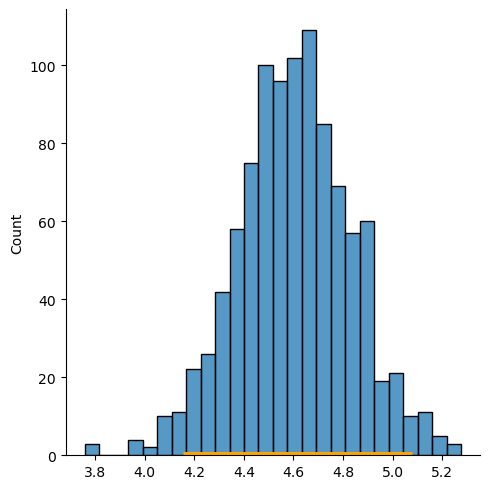

In [20]:
left_end = np.percentile(bstrap_diffs, 2.5, method='higher')
right_end = np.percentile(bstrap_diffs, 97.5, method='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)

# visualize results
facetgrid_obj = sns.displot(bstrap_diffs);
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)  # lw controls thickness of line

Since zero is not in the 95% confidence interval we can reject the null hypothesis and conclude there's a difference between mean math exam score of students who completed the test preperation course, and the mean math exam score of students who didnt complete the test preperation course

In [21]:
df_grades_dummies = pd.get_dummies(df_grades_new, columns=['Gender', 'EthnicGroup', 'ParentEduc','LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','TransportMeans','WklyStudyHours'], drop_first=True)
df_grades_dummies

,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_bachelor's degree,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
2,4.0,87,93,91,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
4,0.0,76,78,75,1,0,1,0,0,0,...,1,1,0,0,0,1,1,1,0,0
5,1.0,73,84,79,0,1,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
6,1.0,85,93,89,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1.0,41,43,39,1,1,0,0,0,0,...,1,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,2.0,58,53,49,1,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
30636,2.0,59,61,65,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
30637,1.0,58,53,51,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
30639,3.0,82,90,93,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


Part 4: Prediction/clustering

we are choosing : Prediction

Question 1:

We want to try to classify whether a student completed the test preperation course ot not.
We had several interesting options to choose the feature we want to classify (we will talk about it in Part 5). 
This interesting to us because as we explained in part 3, we want to see the connections between examss and preperation and
it is very interesting to see if it is useful to classify it.
A future possible application of this classifier could be for the "National Institute For Testing and Evaluation".
They make statistics about test takers and they want to know if they took a preperation course or not and how its effected on their grades.

In [22]:
knn_df = df_grades_dummies

#we need to split our data to train and test sets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# It is usually sensible to randomly shuffle the dataframe first
knn_df = knn_df.sample(frac=1)

# Split to X and Y
X = knn_df.loc[:, knn_df.columns != 'TestPrep_none'] # features
Y = knn_df.loc[:, 'TestPrep_none'].values # labels

# Split to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# because we want to see the correlation in the train set (to prevent leakage between the train and the test), we need to
# unify the x_train and the Y_train sets, afterwards we will divide them.

X_train['TestPrep_none'] = Y_train
X_train


,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_bachelor's degree,...,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10,TestPrep_none
18744,1.0,74,75,80,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
18833,3.0,35,55,50,0,0,1,0,0,0,...,1,0,0,0,1,1,1,0,0,1
12471,5.0,40,53,52,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
11839,3.0,69,65,65,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
24408,2.0,78,90,82,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,0.0,84,75,78,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8803,1.0,58,64,57,1,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
22403,0.0,97,85,86,1,0,0,1,0,0,...,0,0,1,1,0,1,1,1,0,0
997,2.0,68,69,64,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


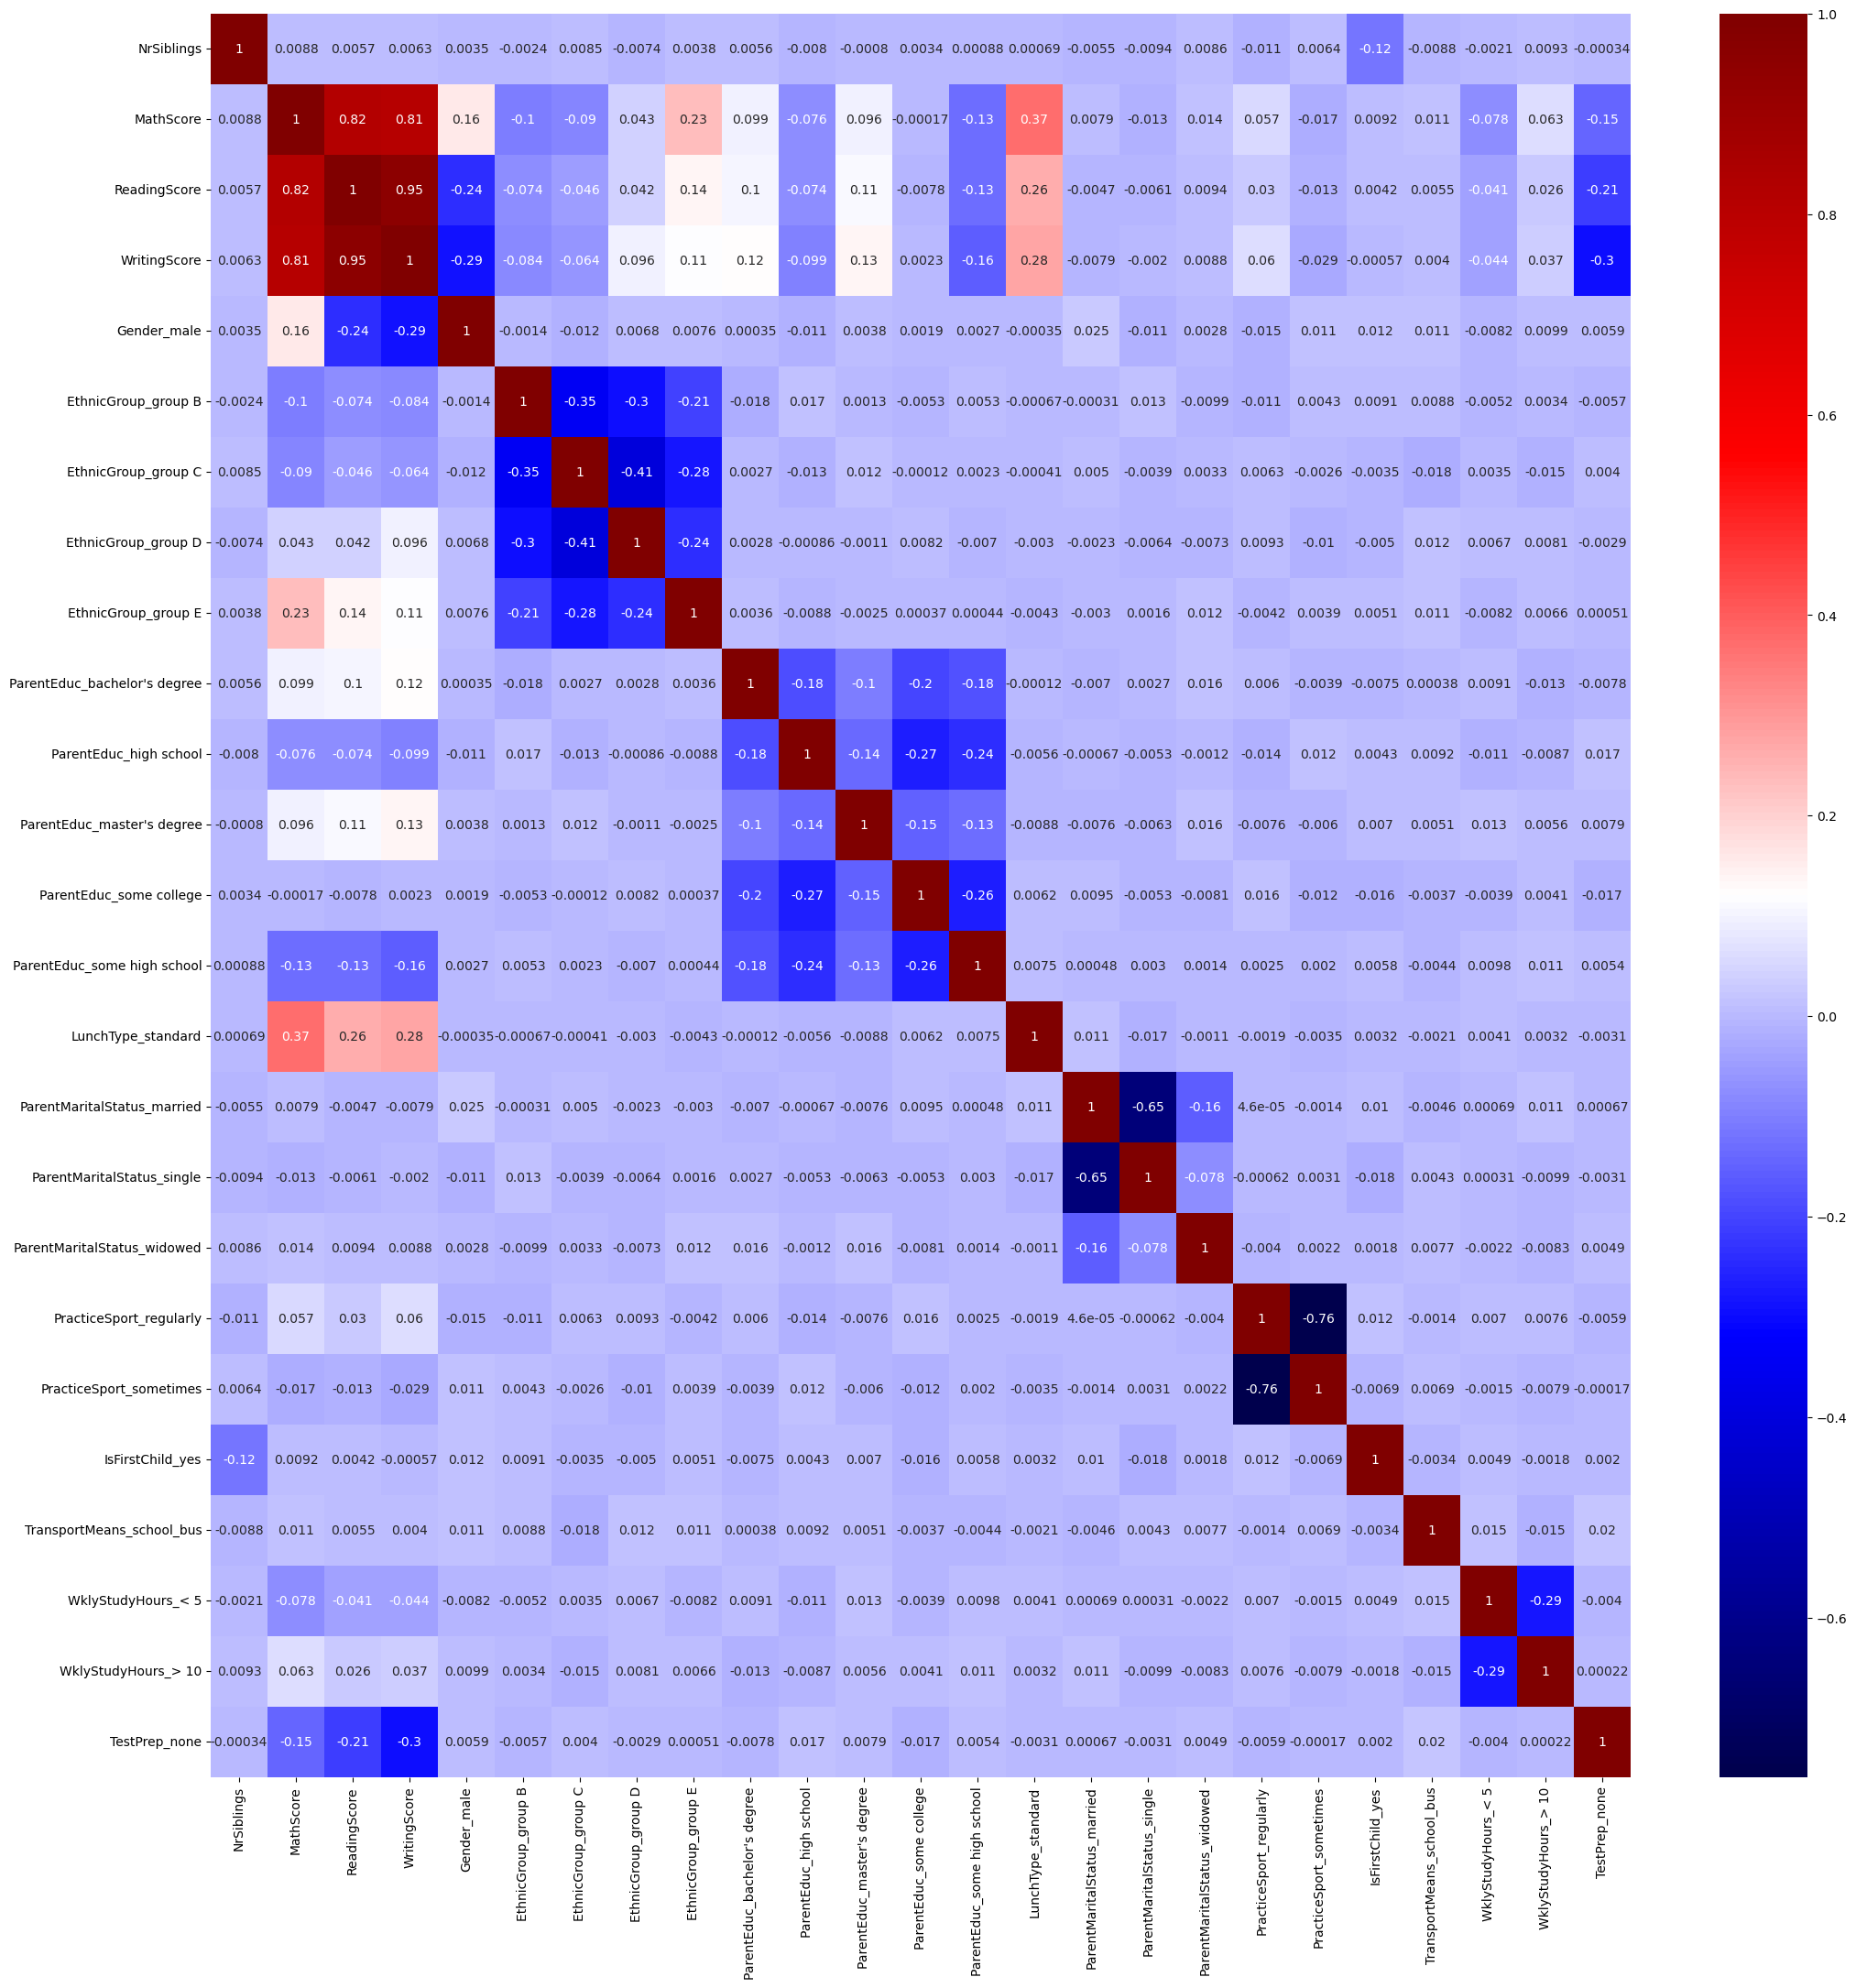

In [23]:
# compute correlation between each pair of variables in data frame
correlations = X_train.corr()

#plot heat map
plt.figure(figsize=(25,25))
g=sns.heatmap(correlations,annot=True,cmap="seismic")

In [24]:
# removing Y_train from combined X and Y to use KNN regulary

X_train.drop(columns=['TestPrep_none'], inplace=True)

Question 2:

The target variable (class) we are trying to predict is "TestPrep", after the dummies function it is called "TestPrep_none".
We chose the variables (features) of "MathScore" , "ReadingScore" , "WritingScore"  to predict the class.
As we can see from the heat map of the correlations matrix, those three features are the most correlated from the other feature
with the target class ( the rest features are in very low correleation with the target class).
We can see that these three features are in high correlation between one and another and we will disscuss it in Part 5.

In [25]:
X_train = X_train[['MathScore','ReadingScore','WritingScore']]
X_test = X_test[['MathScore','ReadingScore','WritingScore']]

We are now interested only in the columns of the class and the selected features, we removed the columns of the non-selected features.

We didnt scaled these veriables because they have the same range and units (0 - 100) 

Question 3:

In [26]:
#Part 1 - Choosing the optimal K using 10-cross validation

k_avg_score = np.zeros(25)
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=10)
    k_avg_score[k] = cv_scores.mean()

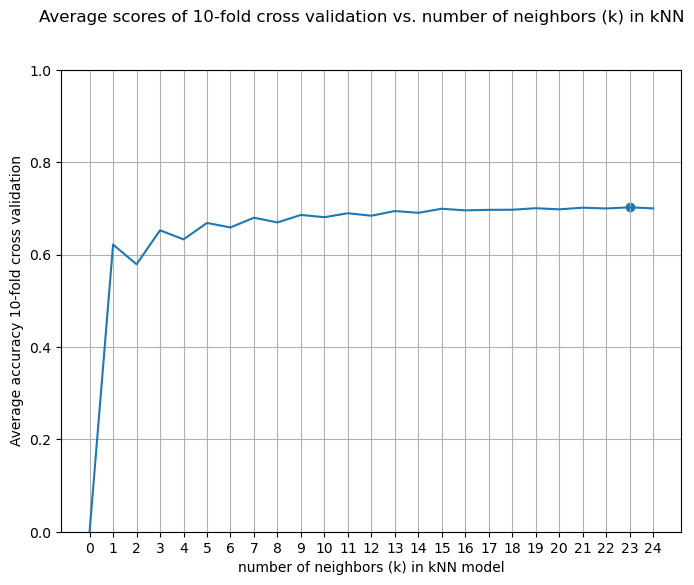

In [27]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 25));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 10-fold cross validation vs. number of neighbors (k) in kNN')
ax.set_xlabel('number of neighbors (k) in kNN model')
ax.set_ylabel('Average accuracy 10-fold cross validation')
plt.grid()

In [28]:
print(f"optimal average accuracy cv score is: {round(np.max(k_avg_score),3)}, for number of neighbors(k) = {np.argmax(k_avg_score)}")

optimal average accuracy cv score is: 0.702, for number of neighbors(k) = 23


In [29]:
#Part 2 - fit the model on the entire train set

knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(X_train, Y_train)

#Part 3 - test the model on the test set
test_score = knn.score(X_test, Y_test)
print(f"Test accuracy score is: {round(test_score,3)}")

Test accuracy score is: 0.704


We built a classifier using 19NN algorithm and 10-fold cv.
From the graph we can see that from k=19 it seems we wont get a better k.
After testing our classifier with the test set, we got an accuracy of 0.693.  
Our model obtains decent accuracy performance, but it slightly underperforms the CV score (which is often the case)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

best_k = np.argmax(k_avg_score) 
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)  
knn_classifier.fit(X_train, Y_train)

# Compute a confusion matrix
predictions = knn_classifier.predict(X=X_test) # get the classifier's predictions 
print('confusion matrix: \n', confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1])) # rows are true values, columns are predicted values

print('precision: ', round(precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]),3))
print('recall: ', round(recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]),3))

confusion matrix: 
 [[ 502  801]
 [ 337 2209]]
precision:  0.734
recall:  0.868


We see the total accuracy is around 70%, also the model has higher recall than precision scores. That is, it is better in recalling positive cases as positives than being precise when predicting a case is positive. 

We saw that in the first part we showed the distribution of the 'TestPrep' feature and we saw that those who didnt complete the course were nearly twice the amount from those who did complete the course.
Since the data is unbalanced we want to check another method of scoring in order to estimate our classifier. Since we think that we need to treat precision and recall in the same way we thought it will be a good idea to use F1 instead.  
We will write the code again with the proper changes.

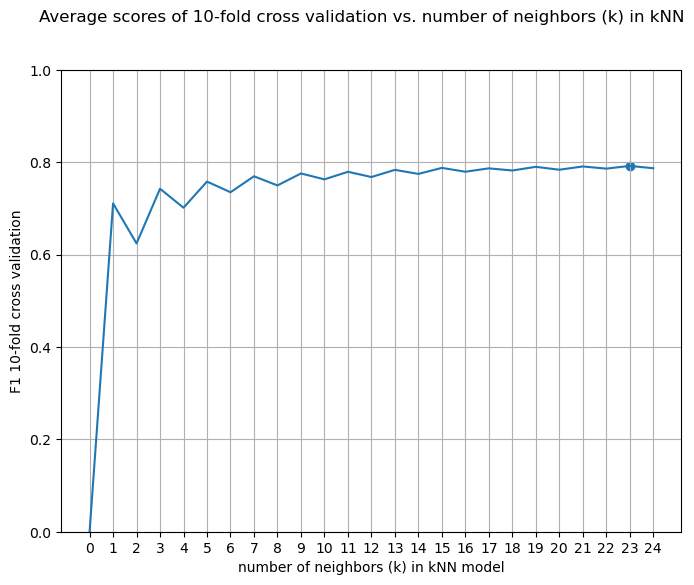

In [31]:
#Same steps but with F1 scoring

k_avg_score = np.zeros(25)
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=10, scoring = "f1")#changing the scoring method to F1
    k_avg_score[k] = cv_scores.mean()
    

fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 25));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 10-fold cross validation vs. number of neighbors (k) in kNN')
ax.set_xlabel('number of neighbors (k) in kNN model')
ax.set_ylabel('F1 10-fold cross validation')
plt.grid()

In [32]:
print(f"optimal F1 cv score is: {round(np.max(k_avg_score),3)}, for number of neighbors(k) = {np.argmax(k_avg_score)}")

optimal F1 cv score is: 0.792, for number of neighbors(k) = 23


In [33]:
from sklearn.metrics import f1_score


knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(X_train, Y_train)


print('F1: ', round(f1_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]),3))

F1:  0.795


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

best_k = np.argmax(k_avg_score) 
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)  
knn_classifier.fit(X_train, Y_train)

# Compute a confusion matrix
predictions = knn_classifier.predict(X=X_test) # get the classifier's predictions 
print('confusion matrix: \n', confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1])) # rows are true values, columns are predicted values

print('precision: ', round(precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]),3))
print('recall: ', round(recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]),3))
print('accuracy: ', round(accuracy_score(y_true=Y_test, y_pred=predictions),3))

confusion matrix: 
 [[ 502  801]
 [ 337 2209]]
precision:  0.734
recall:  0.868
accuracy:  0.704


We want to explore how many observations of students completed the course and failed ( score <= 55) in at least one of the exams left after we removed the missing data rows.  
We will display the discussion in part 5 at the limitaion sector.

In [35]:
# filtering the dataset by all the students which failed at least in one exam, fail is 55 and under.
filter = (df_grades['MathScore'] <= 55) | (df_grades['ReadingScore'] <= 55) | (df_grades['WritingScore'] <= 55)
df_grades_filter = df_grades[filter]
df_grades_filter

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50
10,male,group C,associate's degree,standard,none,NaN,sometimes,yes,1.0,private,5 - 10,58,54,52
11,male,group D,associate's degree,standard,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,40,52,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30625,female,NaN,some high school,free/reduced,completed,single,sometimes,no,3.0,private,5 - 10,47,65,68
30628,female,group B,NaN,free/reduced,none,single,sometimes,no,1.0,school_bus,5 - 10,55,63,63
30630,male,group B,associate's degree,free/reduced,none,married,sometimes,no,4.0,private,5 - 10,43,28,24
30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49


In [36]:
# showing the rows with only the student who completed the preperation course
completed_rows = df_grades_filter[df_grades_filter['TestPrep'] == 'completed']
completed_rows

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
18,male,group C,master's degree,free/reduced,completed,single,sometimes,no,1.0,private,5 - 10,46,42,47
64,male,group D,some college,standard,completed,divorced,sometimes,yes,3.0,private,> 10,64,55,64
75,male,group A,some college,free/reduced,completed,married,sometimes,no,NaN,school_bus,5 - 10,50,47,54
85,male,group C,associate's degree,free/reduced,completed,married,regularly,no,3.0,private,> 10,45,46,52
94,male,group B,high school,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,61,44,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30613,female,group E,bachelor's degree,free/reduced,completed,divorced,regularly,no,1.0,private,< 5,49,58,62
30619,female,group D,high school,free/reduced,completed,single,sometimes,no,5.0,school_bus,5 - 10,39,51,49
30622,male,group A,associate's degree,free/reduced,completed,divorced,regularly,no,3.0,private,5 - 10,53,53,53
30624,female,group B,bachelor's degree,standard,completed,single,regularly,no,1.0,private,5 - 10,41,66,65


In [37]:
# removing the rows with missing data
completed_rows_non = completed_rows.dropna(subset=['EthnicGroup','ParentEduc','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours'])
completed_rows_non.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 18 to 30624
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               1445 non-null   object 
 1   EthnicGroup          1445 non-null   object 
 2   ParentEduc           1445 non-null   object 
 3   LunchType            1445 non-null   object 
 4   TestPrep             1445 non-null   object 
 5   ParentMaritalStatus  1445 non-null   object 
 6   PracticeSport        1445 non-null   object 
 7   IsFirstChild         1445 non-null   object 
 8   NrSiblings           1445 non-null   float64
 9   TransportMeans       1445 non-null   object 
 10  WklyStudyHours       1445 non-null   object 
 11  MathScore            1445 non-null   int64  
 12  ReadingScore         1445 non-null   int64  
 13  WritingScore         1445 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 169.3+ KB
